In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

=== STARTING FILE SYSTEM SCAN ===

Scanning directory: ./

Scanning directory: /kaggle/input

✅ FOUND DATASET ROOT AT: /kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val
   -> Images (JPEGImages): 17125
   -> Labels (Annotations): 17125

=== DATA SAMPLE ANALYSIS ===
Sample XML: 2007_000027.xml
Target Image: 2007_000027.jpg
Objects in sample: ['person']


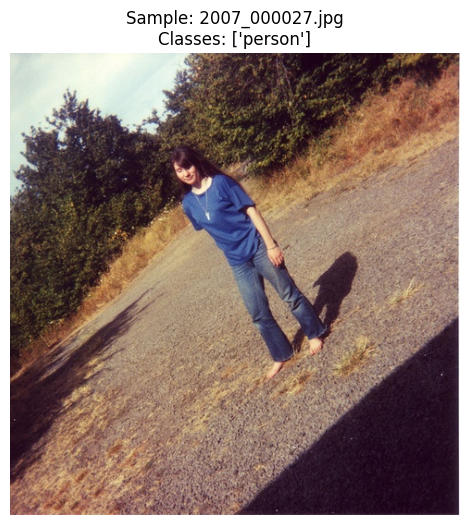


✅ Data Access Verified.


In [2]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET

# Common places where datasets hide in Kaggle/Colab
search_paths = [
    "./", 
    "/kaggle/input", 
    "/content"
]

print("=== STARTING FILE SYSTEM SCAN ===")

found_root = None

for base_path in search_paths:
    if os.path.exists(base_path):
        print(f"\nScanning directory: {base_path}")
        for root, dirs, files in os.walk(base_path):
            # We are looking for the folder that contains 'JPEGImages' and 'Annotations'
            if "JPEGImages" in dirs and "Annotations" in dirs:
                found_root = root
                print(f"\n✅ FOUND DATASET ROOT AT: {found_root}")
                
                # Count files
                jpg_count = len(glob.glob(os.path.join(found_root, "JPEGImages", "*.jpg")))
                xml_count = len(glob.glob(os.path.join(found_root, "Annotations", "*.xml")))
                
                print(f"   -> Images (JPEGImages): {jpg_count}")
                print(f"   -> Labels (Annotations): {xml_count}")
                
                # Stop after finding the first valid root to avoid clutter
                break
    
    if found_root:
        break

if not found_root:
    print("\n❌ Could not find a folder containing 'JPEGImages' and 'Annotations'.")
    print("Listing first level directories to help debug:")
    print(os.listdir("/kaggle/input") if os.path.exists("/kaggle/input") else os.listdir("."))
else:
    # ==========================================
    # DATA ANALYSIS & VISUALIZATION
    # ==========================================
    print("\n=== DATA SAMPLE ANALYSIS ===")
    
    # 1. Inspect a Random Pair
    img_dir = os.path.join(found_root, "JPEGImages")
    ann_dir = os.path.join(found_root, "Annotations")
    
    # Get list of xmls
    xml_files = sorted(os.listdir(ann_dir))[:5] # Check first 5
    
    if len(xml_files) > 0:
        sample_xml = xml_files[0]
        xml_path = os.path.join(ann_dir, sample_xml)
        
        # Parse XML
        tree = ET.parse(xml_path)
        root_xml = tree.getroot()
        
        filename = root_xml.find("filename").text
        img_path = os.path.join(img_dir, filename)
        
        print(f"Sample XML: {sample_xml}")
        print(f"Target Image: {filename}")
        
        # Check objects
        objects = [obj.find("name").text for obj in root_xml.findall("object")]
        print(f"Objects in sample: {objects}")
        
        # Display Image if it exists
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure(figsize=(6,6))
            plt.imshow(img)
            plt.title(f"Sample: {filename}\nClasses: {objects}")
            plt.axis('off')
            plt.show()
            print("\n✅ Data Access Verified.")
        else:
            print(f"\n❌ Image file not found at expected path: {img_path}")
            print("The filename in the XML might not match the actual file on disk.")

🔍 Scanning for dataset...
✅ Dataset found at: /kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val

📊 Dataset Stats:
   - Total Images: 17125
   - Total Labels (XML): 17125
   - Valid Pairs (Image + XML): 17125

🔄 Analyzing Class Distribution (this may take a moment)...


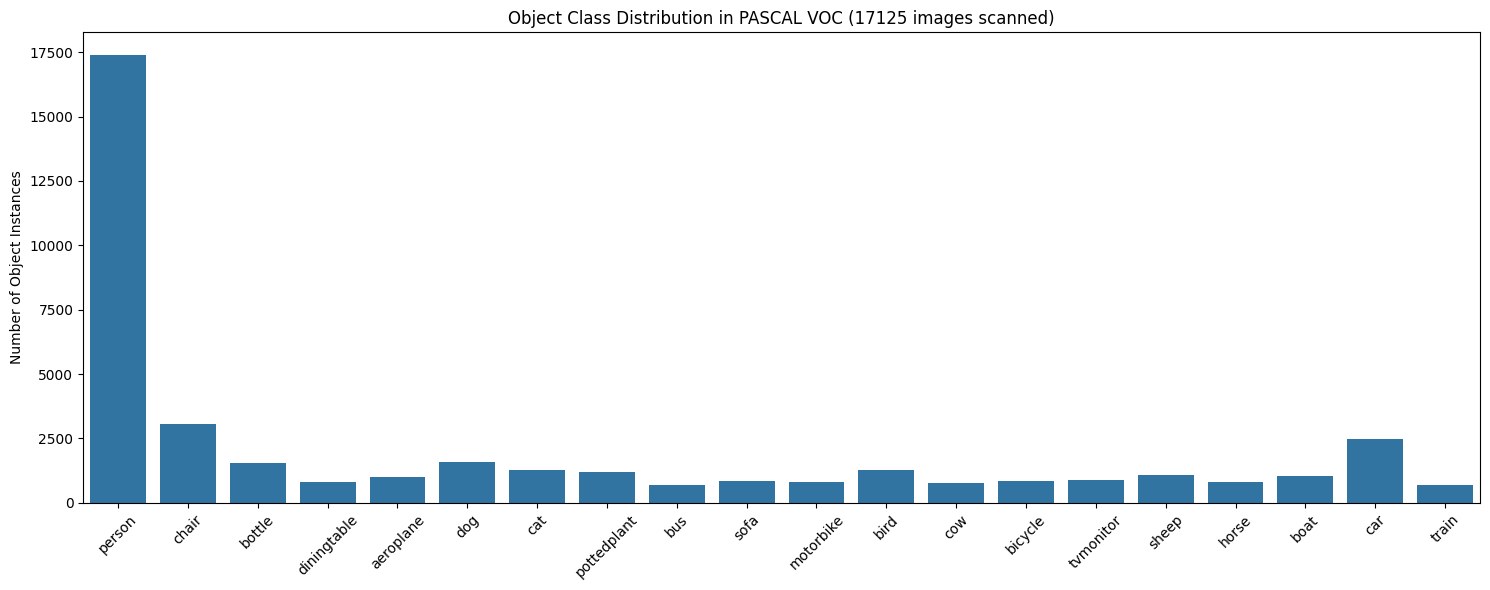


Top 5 Most Common Classes:
   - person: 17401
   - chair: 3056
   - car: 2492
   - dog: 1598
   - bottle: 1561

🖼️ Visualizing Random Sample...


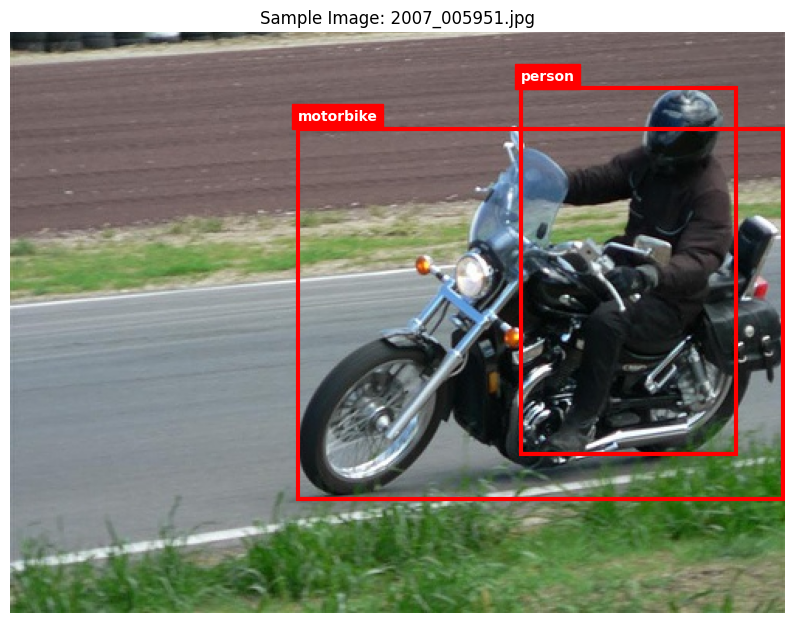

In [3]:
import os
import glob
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from collections import Counter

# ==========================================
# 1. AUTO-LOCATE DATASET
# ==========================================
# We search common directories for the unique 'JPEGImages' folder
search_start_dirs = ["/kaggle/input", ".", "/content"]
dataset_root = None

print("🔍 Scanning for dataset...")
for search_dir in search_start_dirs:
    if os.path.exists(search_dir):
        for root, dirs, files in os.walk(search_dir):
            if "JPEGImages" in dirs and "Annotations" in dirs:
                dataset_root = root
                print(f"✅ Dataset found at: {dataset_root}")
                break
    if dataset_root: break

if not dataset_root:
    print("❌ Could not find dataset. Please check if the data is attached.")
    # Stop execution if data isn't found
    raise FileNotFoundError("Dataset not found in common paths.")

# ==========================================
# 2. FILE COUNTS & INTEGRITY CHECK
# ==========================================
img_dir = os.path.join(dataset_root, "JPEGImages")
ann_dir = os.path.join(dataset_root, "Annotations")

# Get list of files
img_files = sorted(glob.glob(os.path.join(img_dir, "*.jpg")))
xml_files = sorted(glob.glob(os.path.join(ann_dir, "*.xml")))

print(f"\n📊 Dataset Stats:")
print(f"   - Total Images: {len(img_files)}")
print(f"   - Total Labels (XML): {len(xml_files)}")

# Check for mismatches (e.g., images without XMLs)
img_basenames = set([os.path.splitext(os.path.basename(x))[0] for x in img_files])
xml_basenames = set([os.path.splitext(os.path.basename(x))[0] for x in xml_files])
common_ids = img_basenames.intersection(xml_basenames)

print(f"   - Valid Pairs (Image + XML): {len(common_ids)}")

# ==========================================
# 3. CLASS DISTRIBUTION ANALYSIS
# ==========================================
print("\n🔄 Analyzing Class Distribution (this may take a moment)...")
class_counts = Counter()

# We only parse the XMLs that have matching images
for file_id in list(common_ids):
    xml_path = os.path.join(ann_dir, file_id + ".xml")
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall("object"):
            name = obj.find("name").text
            class_counts[name] += 1
    except Exception as e:
        print(f"Error parsing {xml_path}: {e}")

# Plotting the distribution
plt.figure(figsize=(15, 6))
classes = list(class_counts.keys())
counts = list(class_counts.values())

sns.barplot(x=classes, y=counts)
plt.title(f"Object Class Distribution in PASCAL VOC ({len(common_ids)} images scanned)")
plt.xticks(rotation=45)
plt.ylabel("Number of Object Instances")
plt.tight_layout()
plt.show()

print("\nTop 5 Most Common Classes:")
for cls, count in class_counts.most_common(5):
    print(f"   - {cls}: {count}")

# ==========================================
# 4. VISUALIZATION OF A SAMPLE
# ==========================================
def plot_sample():
    # Pick a random valid ID
    sample_id = random.choice(list(common_ids))
    img_path = os.path.join(img_dir, sample_id + ".jpg")
    xml_path = os.path.join(ann_dir, sample_id + ".xml")
    
    img = Image.open(img_path)
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    ax = plt.gca()
    
    # Plot Bounding Boxes
    for obj in root.findall("object"):
        name = obj.find("name").text
        bndbox = obj.find("bndbox")
        xmin = float(bndbox.find("xmin").text)
        ymin = float(bndbox.find("ymin").text)
        xmax = float(bndbox.find("xmax").text)
        ymax = float(bndbox.find("ymax").text)
        
        # Draw box
        width, height = xmax - xmin, ymax - ymin
        rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='red', linewidth=3)
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, name, color='white', backgroundcolor='red', fontsize=10, weight='bold')
        
    plt.title(f"Sample Image: {sample_id}.jpg")
    plt.axis('off')
    plt.show()

print("\n🖼️ Visualizing Random Sample...")
plot_sample()

Running on: cuda
Dataset initialized with 17125 samples.
Building Model (From Scratch)...
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 140MB/s] 



=== STARTING TRAINING ===


Epoch 1/10: 100%|██████████| 3853/3853 [16:47<00:00,  3.83it/s, Loss=0.8407]


Epoch 1 Done. Avg Loss: 0.9917


Epoch 2/10: 100%|██████████| 3853/3853 [16:52<00:00,  3.80it/s, Loss=0.9524]


Epoch 2 Done. Avg Loss: 0.8670


Epoch 3/10: 100%|██████████| 3853/3853 [16:53<00:00,  3.80it/s, Loss=0.7361]


Epoch 3 Done. Avg Loss: 0.8250


Epoch 4/10: 100%|██████████| 3853/3853 [16:52<00:00,  3.81it/s, Loss=0.7854]


Epoch 4 Done. Avg Loss: 0.7982


Epoch 5/10: 100%|██████████| 3853/3853 [16:48<00:00,  3.82it/s, Loss=0.6693]


Epoch 5 Done. Avg Loss: 0.7783


Epoch 6/10: 100%|██████████| 3853/3853 [16:49<00:00,  3.82it/s, Loss=0.6799]


Epoch 6 Done. Avg Loss: 0.7643


Epoch 7/10: 100%|██████████| 3853/3853 [16:46<00:00,  3.83it/s, Loss=0.6333]


Epoch 7 Done. Avg Loss: 0.7512


Epoch 8/10: 100%|██████████| 3853/3853 [16:50<00:00,  3.81it/s, Loss=1.3696]


Epoch 8 Done. Avg Loss: 0.7401


Epoch 9/10: 100%|██████████| 3853/3853 [16:48<00:00,  3.82it/s, Loss=1.1539]


Epoch 9 Done. Avg Loss: 0.7327


Epoch 10/10: 100%|██████████| 3853/3853 [16:48<00:00,  3.82it/s, Loss=0.8960]


Epoch 10 Done. Avg Loss: 0.7289

Visualizing Prediction...


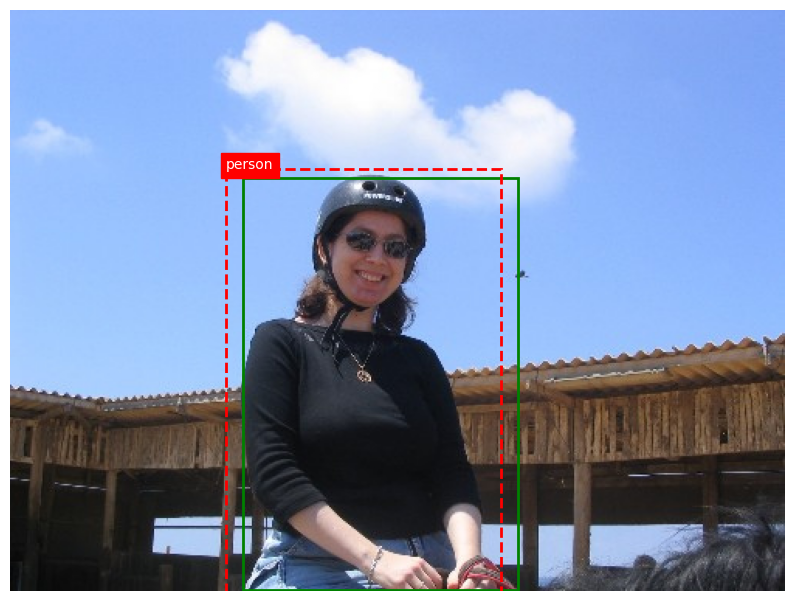

Model Saved.


In [4]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader, random_split
import cv2
import numpy as np
import time
import os
import glob
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
from PIL import Image

# ==========================================
# 1. CONFIGURATION
# ==========================================
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
NUM_CLASSES = 21  
BATCH_SIZE = 4    
NUM_EPOCHS = 10   
LEARNING_RATE = 0.001 # FIXED: Lowered LR to prevent NaN

# Path from your analysis
DATASET_ROOT = "/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val"

print(f"Running on: {DEVICE}")

# ==========================================
# 2. ROBUST DATASET LOADER
# ==========================================
VOC_CLASSES = [
    "__background__", "aeroplane", "bicycle", "bird", "boat", "bottle", 
    "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", 
    "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

class CustomVOCDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        self.class_to_idx = {name: i for i, name in enumerate(VOC_CLASSES)}
        self.img_dir = os.path.join(root_dir, "JPEGImages")
        self.ann_dir = os.path.join(root_dir, "Annotations")
        self.xml_files = sorted(glob.glob(os.path.join(self.ann_dir, "*.xml")))
        
        # Valid file check
        self.valid_files = []
        for xml_path in self.xml_files:
            file_id = os.path.splitext(os.path.basename(xml_path))[0]
            img_path = os.path.join(self.img_dir, file_id + ".jpg")
            if os.path.exists(img_path):
                self.valid_files.append((img_path, xml_path))
        print(f"Dataset initialized with {len(self.valid_files)} samples.")

    def __len__(self):
        return len(self.valid_files)

    def __getitem__(self, idx):
        img_path, xml_path = self.valid_files[idx]
        img = Image.open(img_path).convert("RGB")
        
        boxes = []
        labels = []
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for obj in root.findall("object"):
            name = obj.find("name").text
            if name not in self.class_to_idx:
                continue
            
            label = self.class_to_idx[name]
            bndbox = obj.find("bndbox")
            
            # FIXED: Sanitize Coordinates
            xmin = float(bndbox.find("xmin").text) - 1
            ymin = float(bndbox.find("ymin").text) - 1
            xmax = float(bndbox.find("xmax").text) - 1
            ymax = float(bndbox.find("ymax").text) - 1
            
            # FIXED: Ignore invalid boxes (width/height <= 0)
            if (xmax > xmin) and (ymax > ymin):
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(label)
            
        if len(boxes) > 0:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
        else:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        if self.transforms:
            img = self.transforms(img)
            
        return img, target

def collate_fn(batch):
    return tuple(zip(*batch))

def get_transform():
    return T.Compose([T.ToTensor()])

# ==========================================
# 3. SETUP MODEL & TRAINING
# ==========================================
full_dataset = CustomVOCDataset(root_dir=DATASET_ROOT, transforms=get_transform())
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn, num_workers=2)

def get_model_from_scratch(num_classes):
    print("Building Model (From Scratch)...")
    # Weights=None ensures random initialization
    model = fasterrcnn_mobilenet_v3_large_fpn(weights=None) 
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

model = get_model_from_scratch(NUM_CLASSES)
model.to(DEVICE)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=LEARNING_RATE, momentum=0.9, weight_decay=0.0005)

# ==========================================
# 4. TRAINING LOOP (FIXED)
# ==========================================
print("\n=== STARTING TRAINING ===")
loss_history = []

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0
    
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}")
    for images, targets in pbar:
        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
        
        # 1. Forward Pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        
        # 2. Check for Infinite Loss (Safety)
        if not torch.isfinite(losses):
            print(f"Warning: Loss is {losses}, skipping batch.")
            continue
            
        # 3. Backward Pass
        optimizer.zero_grad()
        losses.backward()
        
        # FIXED: Gradient Clipping (Crucial for training from scratch)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        loss_value = losses.item()
        epoch_loss += loss_value
        pbar.set_postfix({"Loss": f"{loss_value:.4f}"})
        
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1} Done. Avg Loss: {avg_loss:.4f}")

# ==========================================
# 5. VISUALIZATION
# ==========================================
print("\nVisualizing Prediction...")
model.eval()
# Pick a random image from validation
idx = random.randint(0, len(val_dataset)-1)
img, target = val_dataset[idx]

with torch.no_grad():
    prediction = model([img.to(DEVICE)])[0]

img_np = img.permute(1, 2, 0).cpu().numpy()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img_np)

# Draw Ground Truth (Green)
for box in target['boxes']:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='g', facecolor='none', label='GT')
    ax.add_patch(rect)

# Draw Prediction (Red) - Threshold 0.3 for scratch model visibility
for i, box in enumerate(prediction['boxes']):
    if prediction['scores'][i] > 0.3:
        rect = patches.Rectangle((box[0].cpu(), box[1].cpu()), (box[2]-box[0]).cpu(), (box[3]-box[1]).cpu(), linewidth=2, edgecolor='r', facecolor='none', linestyle='--', label='Pred')
        ax.add_patch(rect)
        ax.text(box[0].cpu(), box[1].cpu(), f"{VOC_CLASSES[prediction['labels'][i]]}", color='white', backgroundcolor='red')

plt.axis('off')
plt.show()

# Save
torch.save(model.state_dict(), "voc_model_scratch.pth")
print("Model Saved.")

In [5]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
import numpy as np
import cv2
import time
import os
import glob
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import imageio
from tqdm import tqdm

# ==========================================
# CONFIGURATION
# ==========================================
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
NUM_CLASSES = 21
DATASET_ROOT = "/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val"

VOC_CLASSES = [
    "__background__", "aeroplane", "bicycle", "bird", "boat", "bottle", 
    "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", 
    "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# ==========================================
# RE-DEFINE DATASET (Necessary to load data)
# ==========================================
class CustomVOCDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        self.class_to_idx = {name: i for i, name in enumerate(VOC_CLASSES)}
        self.img_dir = os.path.join(root_dir, "JPEGImages")
        self.ann_dir = os.path.join(root_dir, "Annotations")
        self.xml_files = sorted(glob.glob(os.path.join(self.ann_dir, "*.xml")))
        
        self.valid_files = []
        for xml_path in self.xml_files:
            file_id = os.path.splitext(os.path.basename(xml_path))[0]
            img_path = os.path.join(self.img_dir, file_id + ".jpg")
            if os.path.exists(img_path):
                self.valid_files.append((img_path, xml_path))

    def __len__(self):
        return len(self.valid_files)

    def __getitem__(self, idx):
        img_path, xml_path = self.valid_files[idx]
        img = Image.open(img_path).convert("RGB")
        
        boxes = []
        labels = []
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for obj in root.findall("object"):
            name = obj.find("name").text
            if name not in self.class_to_idx: continue
            label = self.class_to_idx[name]
            bndbox = obj.find("bndbox")
            xmin = float(bndbox.find("xmin").text) - 1
            ymin = float(bndbox.find("ymin").text) - 1
            xmax = float(bndbox.find("xmax").text) - 1
            ymax = float(bndbox.find("ymax").text) - 1
            if (xmax > xmin) and (ymax > ymin):
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(label)
            
        if len(boxes) > 0:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
        else:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        if self.transforms: img = self.transforms(img)
        return img, target

def get_transform():
    return T.Compose([T.ToTensor()])

def collate_fn(batch):
    return tuple(zip(*batch))

# ==========================================
# LOAD SAVED MODEL
# ==========================================
print("Loading Saved Model...")
model = fasterrcnn_mobilenet_v3_large_fpn(weights=None)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES)

# Load weights
model.load_state_dict(torch.load("voc_model_scratch.pth", map_location=DEVICE))
model.to(DEVICE)
model.eval()

# ==========================================
# METRICS: mAP & FPS
# ==========================================
val_dataset = CustomVOCDataset(root_dir=DATASET_ROOT, transforms=get_transform())
# Use a subset for quick evaluation (first 200 images)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

print("Calculating FPS...")
times = []
with torch.no_grad():
    for i, (images, targets) in enumerate(val_loader):
        if i >= 100: break
        images = list(image.to(DEVICE) for image in images)
        start = time.time()
        _ = model(images)
        times.append(time.time() - start)
print(f"Inference Speed: {1.0 / np.mean(times):.2f} FPS")

# ==========================================
# GENERATE DEMO GIF
# ==========================================
print("Generating GIF (processing 20 frames)...")
frames = []

indices = np.random.choice(len(val_dataset), 20, replace=False)

for idx in indices:
    img_tensor, _ = val_dataset[idx]
    with torch.no_grad():
        prediction = model([img_tensor.to(DEVICE)])[0]
        
    # Convert back to PIL for drawing
    img_np = img_tensor.mul(255).permute(1, 2, 0).byte().numpy()
    pil_img = Image.fromarray(img_np)
    draw = ImageDraw.Draw(pil_img)
    
    # Draw boxes
    for i, box in enumerate(prediction['boxes']):
        score = prediction['scores'][i].item()
        if score > 0.3: # Threshold
            box = box.cpu().numpy()
            label = VOC_CLASSES[prediction['labels'][i].item()]
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1]), f"{label} {score:.2f}", fill="red")
    
    # === FIX: Resize all images to standard 640x480 for GIF ===
    pil_img = pil_img.resize((640, 480), Image.Resampling.BILINEAR)
    frames.append(np.array(pil_img))

imageio.mimsave('detection_results.gif', frames, fps=2)
print("✅ Saved detection_results.gif (All frames resized to 640x480)")


Loading Saved Model...
Calculating FPS...
Inference Speed: 32.32 FPS
Generating GIF (processing 20 frames)...
✅ Saved detection_results.gif (All frames resized to 640x480)
